In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [219]:
# Ruta al archivo JSON
# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)


In [220]:
df = pd.read_csv('../data/processed/df_final.csv')

Función para sacar porcentajes relativos a la target


In [221]:
def percentage_dep_anx (valor):
    counts = df.groupby([valor, 'dep_anx']).size()
    counts_df = counts.unstack()
    percentage_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
    print(percentage_df)


Función para extraer los json

In [222]:
def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

In [223]:
def percentage_dep_anx (valor):
    counts = df.groupby([valor, 'dep_anx']).size()
    counts_df = counts.unstack()
    percentage_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
    print(percentage_df)

Función para relacionar con countplot y target, pasandole el json

In [224]:
def multivariable_plot (valor):
    values, categories, title= parse_json(valor)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(data = df, x = valor, hue ='dep_anx', ax=ax)
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(categories,  rotation=90)
    plt.show()
    print(categories)


In [240]:
def multivariable_lineplot (valor):
    values, categories, title= parse_json(valor)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.lineplot(data = df, x = valor, y ='dep_anx', ax=ax)
    ax.set_xticks(values)
    ax.set_xticklabels(categories,  rotation=90)
    plt.show()
    print(categories)

Sexo

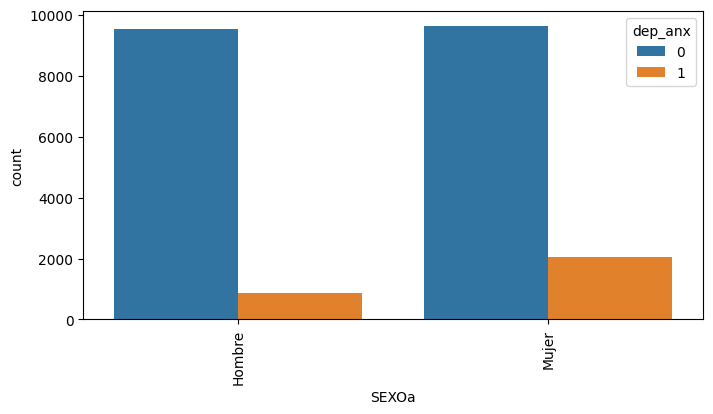

['Hombre', 'Mujer']
dep_anx          0          1
SEXOa                        
1.0      91.742060   8.257940
2.0      82.443075  17.556925


In [225]:
x_ = 'SEXOa'
multivariable_plot(x_)
percentage_dep_anx(x_)

Estado Civil

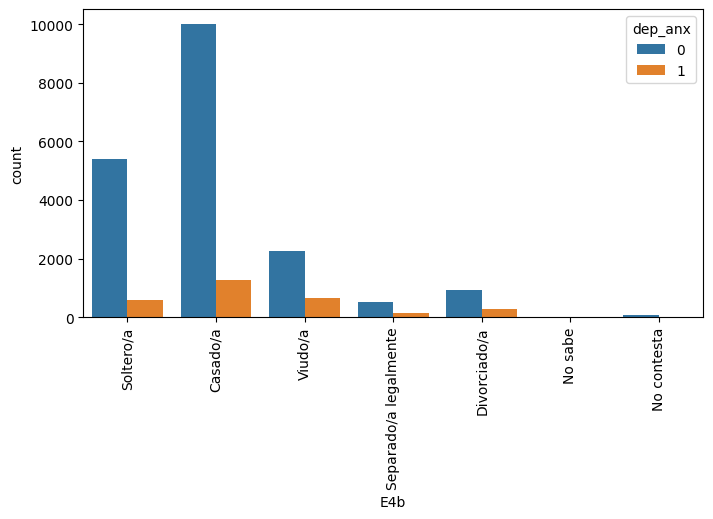

['Soltero/a', 'Casado/a', 'Viudo/a', 'Separado/a legalmente', 'Divorciado/a', 'No sabe', 'No contesta']
dep_anx           0          1
E4b                           
1.0       90.112096   9.887904
2.0       88.682417  11.317583
3.0       77.658840  22.341160
4.0       80.461538  19.538462
5.0       78.021978  21.978022
8.0      100.000000        NaN
9.0       92.063492   7.936508


In [226]:
x_ = 'E4b'
multivariable_plot(x_)
percentage_dep_anx(x_)

Cuadros Depresivos

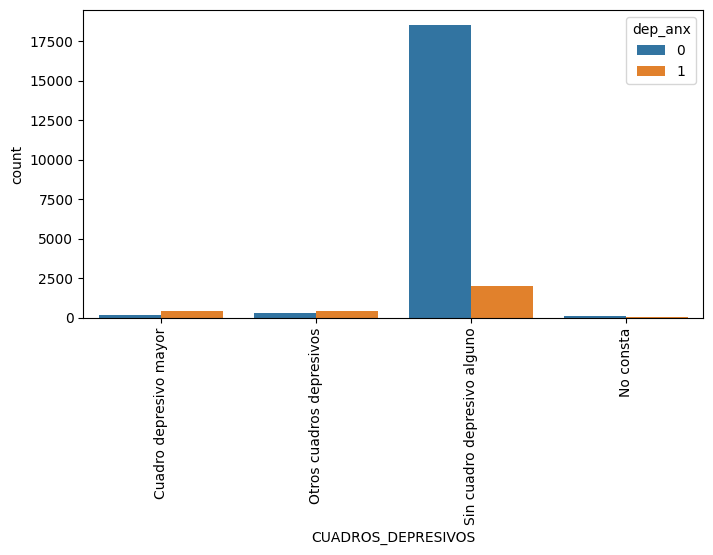

['Cuadro depresivo mayor', 'Otros cuadros depresivos', 'Sin cuadro depresivo alguno', 'No consta']
dep_anx                     0          1
CUADROS_DEPRESIVOS                      
1.0                 28.064516  71.935484
2.0                 44.113667  55.886333
3.0                 90.301231   9.698769
9.0                 65.243902  34.756098


In [227]:
x_ = 'CUADROS_DEPRESIVOS'
multivariable_plot(x_)
percentage_dep_anx(x_)

Clase social basado en la ocupacion

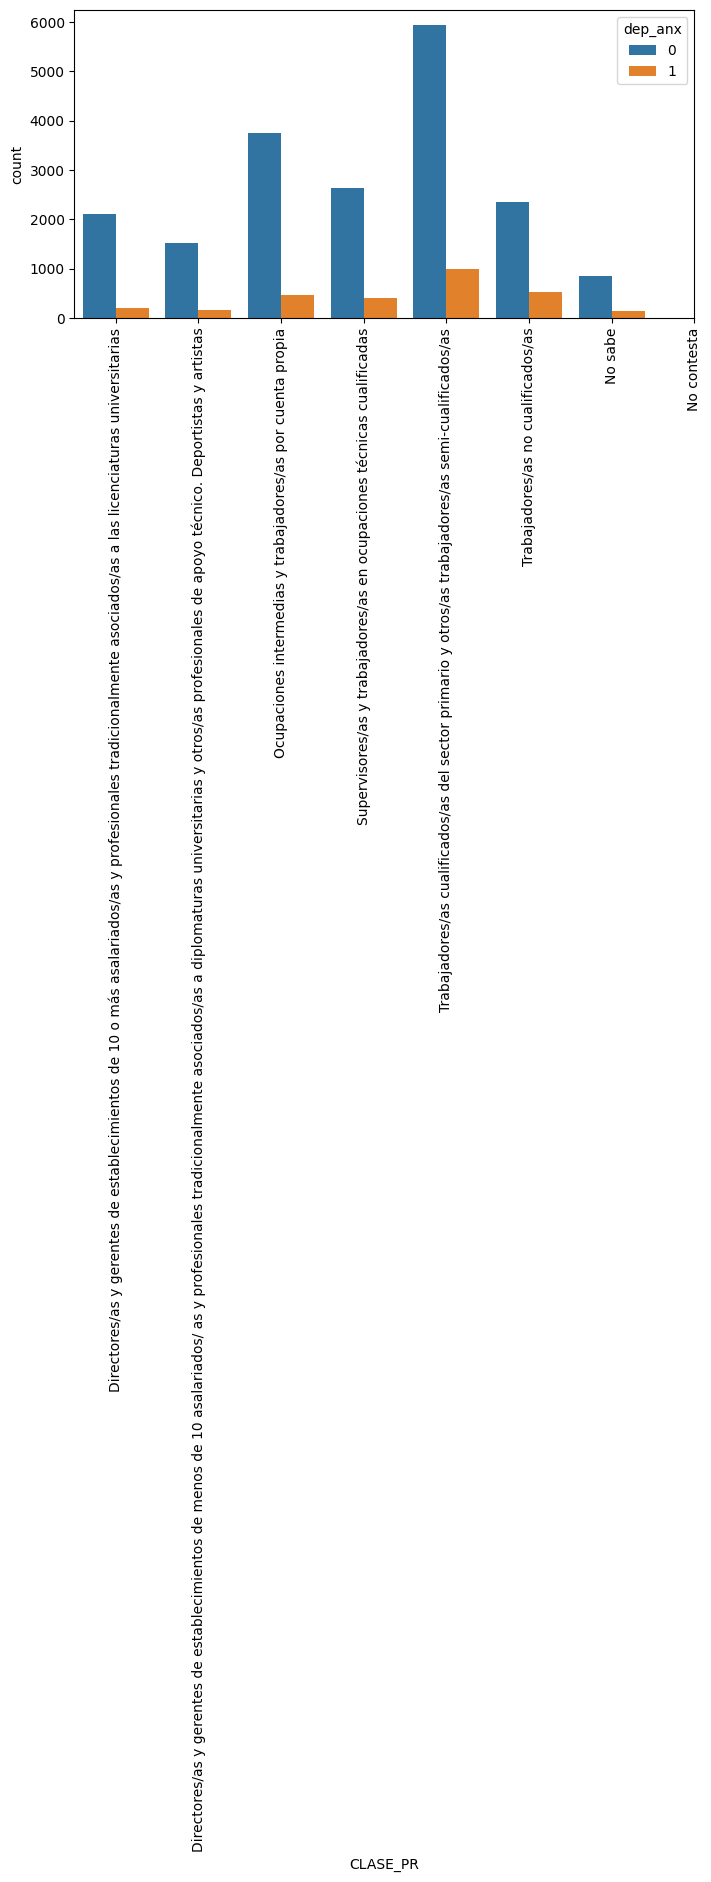

['Directores/as y gerentes de establecimientos de 10 o más asalariados/as y profesionales tradicionalmente asociados/as a las licenciaturas universitarias', 'Directores/as y gerentes de establecimientos de menos de 10 asalariados/ as y profesionales tradicionalmente asociados/as a diplomaturas universitarias y otros/as profesionales de apoyo técnico. Deportistas y artistas', 'Ocupaciones intermedias y trabajadores/as por cuenta propia', 'Supervisores/as y trabajadores/as en ocupaciones técnicas cualificadas', 'Trabajadores/as cualificados/as del sector primario y otros/as trabajadores/as semi-cualificados/as', 'Trabajadores/as no cualificados/as', 'No sabe', 'No contesta']
dep_anx           0          1
CLASE_PR                      
1.0       91.395046   8.604954
2.0       89.934485  10.065515
3.0       88.765374  11.234626
4.0       86.646982  13.353018
5.0       85.751370  14.248630
6.0       81.774082  18.225918
9.0       85.341365  14.658635


In [228]:
x_ = 'CLASE_PR'
multivariable_plot(x_)
percentage_dep_anx(x_)

Numero de cigarros

dep_anx           0           1
V123                           
1.0       85.714286   14.285714
2.0       88.976378   11.023622
3.0       89.795918   10.204082
4.0       85.792350   14.207650
5.0       86.274510   13.725490
6.0       87.443946   12.556054
7.0       84.971098   15.028902
8.0       87.027027   12.972973
9.0       82.857143   17.142857
10.0      83.046683   16.953317
11.0      80.000000   20.000000
12.0      84.905660   15.094340
13.0      80.000000   20.000000
14.0      82.142857   17.857143
15.0      84.782609   15.217391
16.0      68.421053   31.578947
17.0      68.750000   31.250000
18.0      88.235294   11.764706
19.0     100.000000         NaN
20.0      82.154882   17.845118
22.0      66.666667   33.333333
23.0      50.000000   50.000000
24.0     100.000000         NaN
25.0      90.384615    9.615385
26.0     100.000000         NaN
29.0            NaN  100.000000
30.0      83.908046   16.091954
34.0     100.000000         NaN
35.0     100.000000         NaN
40.0    

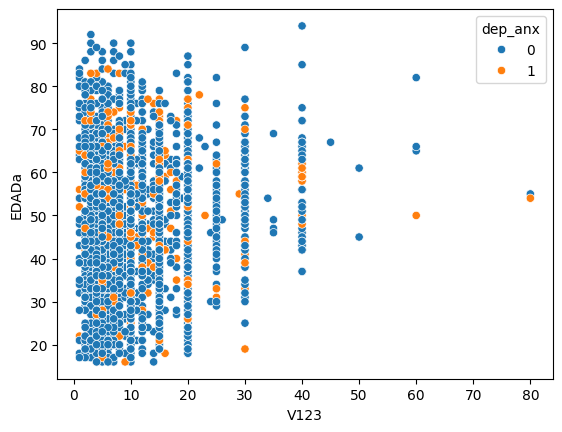

In [229]:
df_clone = df.query('V123<98')
x_ = 'V123'
sns.scatterplot(data = df_clone, x = x_, y = 'EDADa',hue='dep_anx')
percentage_dep_anx(x_)

Indice de Masa Corporal

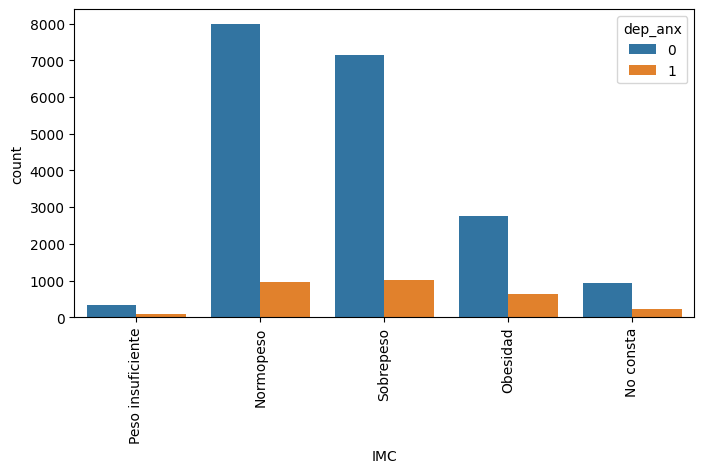

['Peso insuficiente', 'Normopeso', 'Sobrepeso', 'Obesidad', 'No consta']
dep_anx          0          1
IMC                          
1.0      80.589681  19.410319
2.0      89.156627  10.843373
3.0      87.714566  12.285434
4.0      81.296241  18.703759
9.0      80.789022  19.210978


In [230]:
x_ = 'IMC'

multivariable_plot(x_)
percentage_dep_anx(x_)

Nacionalidad Española

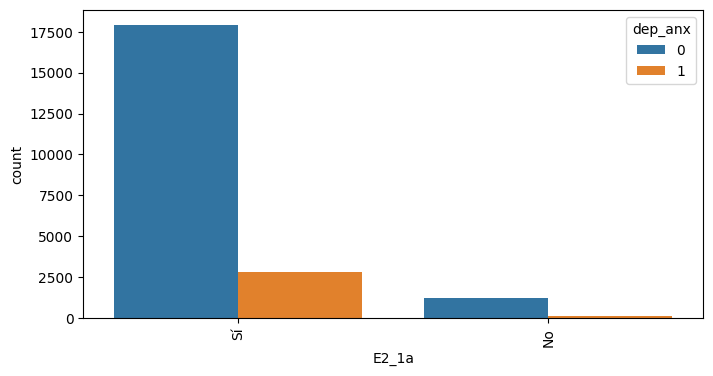

['Sí', 'No']
dep_anx          0          1
E2_1a                        
1.0      86.501590  13.498410
2.0      91.856925   8.143075


In [231]:
x_ = 'E2_1a'

multivariable_plot(x_)
percentage_dep_anx(x_)

Falta de atención sanitaria debido a problemas económicos

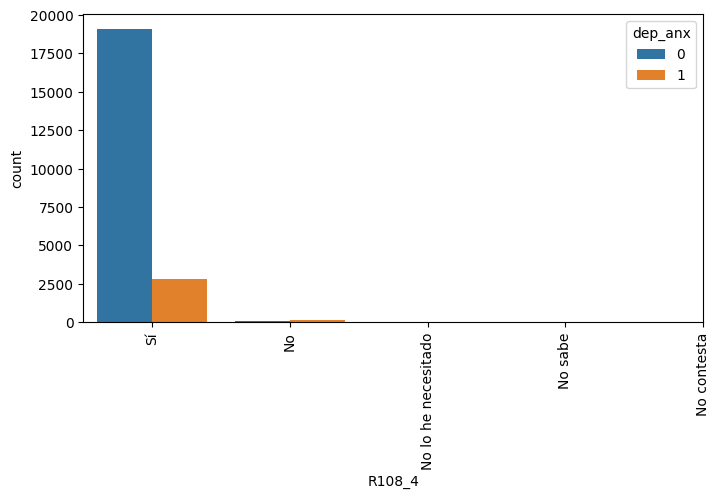

['Sí', 'No', 'No lo he necesitado', 'No sabe', 'No contesta']
dep_anx          0          1
R108_4                       
0        87.246483  12.753517
1        35.000000  65.000000


In [232]:
x_ = 'R108_4'
multivariable_plot(x_)
percentage_dep_anx(x_)

Comunidad Autónoma

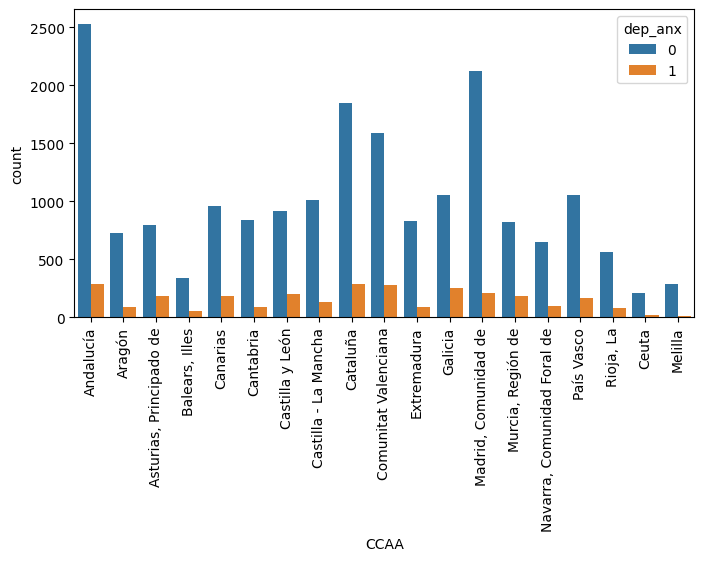

['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia', 'Madrid, Comunidad de', 'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta', 'Melilla']
dep_anx          0          1
CCAA                         
1.0      89.680851  10.319149
2.0      88.915956  11.084044
3.0      81.307457  18.692543
4.0      85.858586  14.141414
5.0      84.007030  15.992970
6.0      90.096878   9.903122
7.0      81.761566  18.238434
8.0      88.568935  11.431065
9.0      86.529467  13.470533
10.0     84.866310  15.133690
11.0     90.249187   9.750813
12.0     80.674847  19.325153
13.0     91.147400   8.852600
14.0     81.827210  18.172790
15.0     87.148594  12.851406
16.0     86.086249  13.913751
17.0     87.500000  12.500000
18.0     92.241379   7.758621
19.0     96.598639   3.401361


In [233]:
x_ = 'CCAA'
multivariable_plot(x_)
percentage_dep_anx(x_)

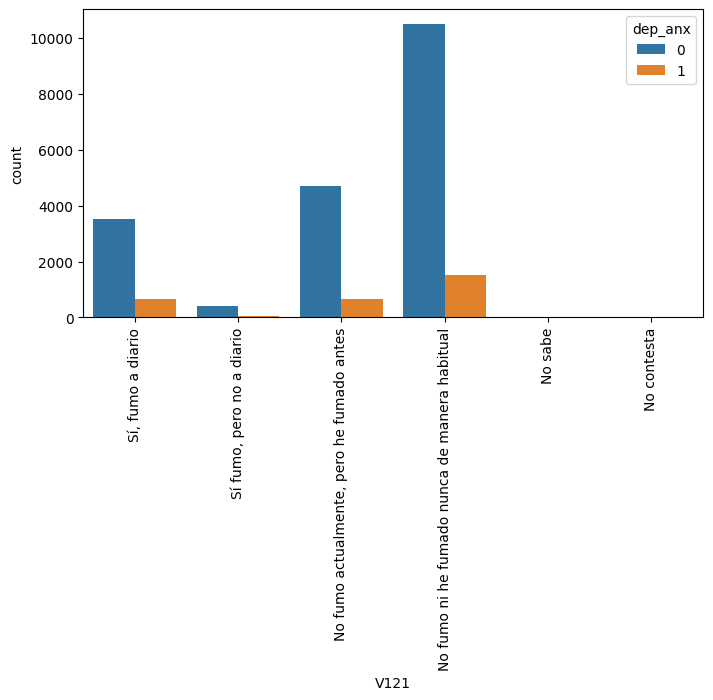

['Sí, fumo a diario', 'Sí fumo, pero no a diario', 'No fumo actualmente, pero he fumado antes', 'No fumo ni he fumado nunca de manera habitual', 'No sabe', 'No contesta']
dep_anx          0          1
V121                         
1.0      84.370512  15.629488
2.0      88.913043  11.086957
3.0      87.506972  12.493028
4.0      87.276358  12.723642
8.0      85.714286  14.285714
9.0      90.322581   9.677419


In [234]:
x_ = 'V121'
multivariable_plot(x_)
percentage_dep_anx(x_)

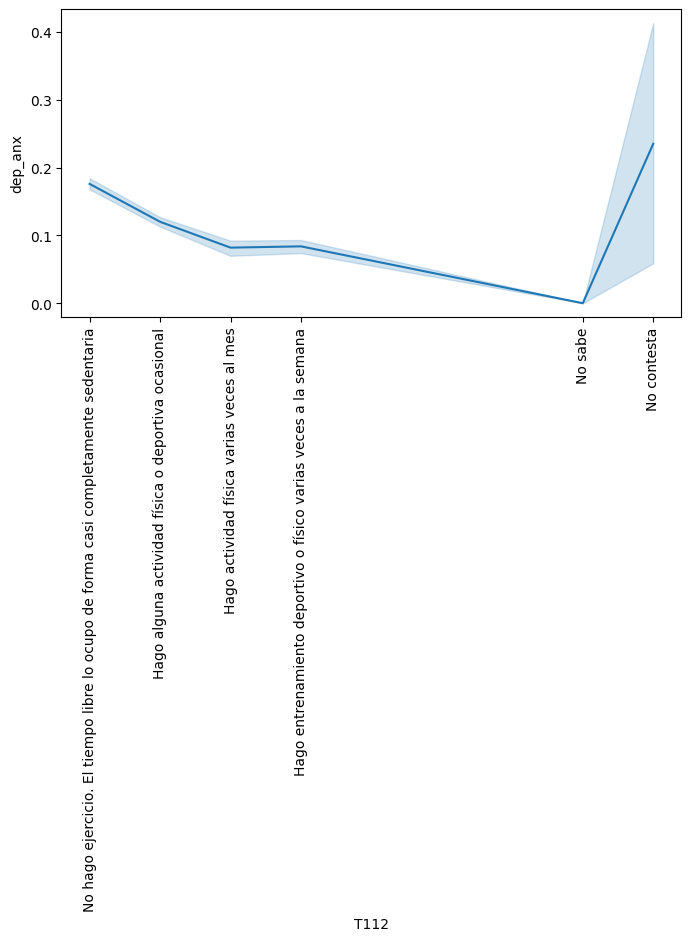

['No hago ejercicio. El tiempo libre lo ocupo de forma casi completamente sedentaria', 'Hago alguna actividad física o deportiva ocasional', 'Hago actividad física varias veces al mes', 'Hago entrenamiento deportivo o físico varias veces a la semana', 'No sabe', 'No contesta']
dep_anx           0          1
T112                          
1.0       82.388936  17.611064
2.0       87.979570  12.020430
3.0       91.796701   8.203299
4.0       91.607087   8.392913
8.0      100.000000        NaN
9.0       76.470588  23.529412


In [241]:
x_ = 'T112'
multivariable_lineplot(x_)
percentage_dep_anx(x_)

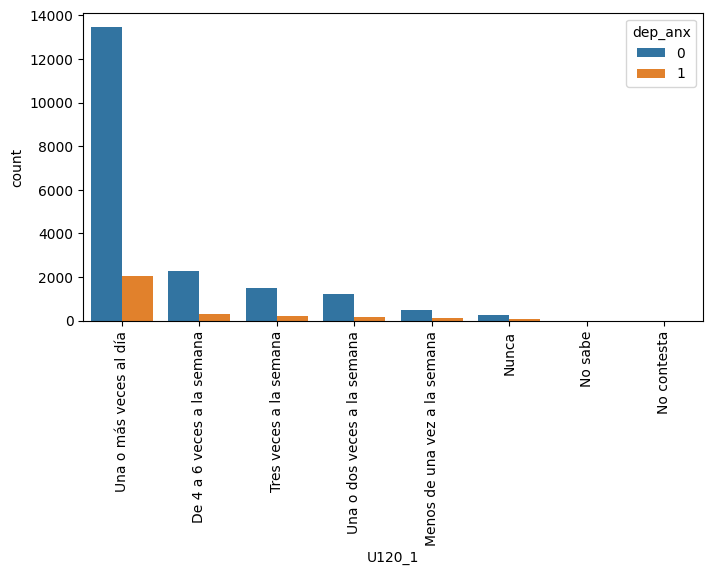

['Una o más veces al día', 'De 4 a 6 veces a la semana', 'Tres veces a la semana', 'Una o dos veces a la semana', 'Menos de una vez a la semana', 'Nunca', 'No sabe', 'No contesta']
dep_anx           0          1
U120_1                        
1.0       86.686009  13.313991
2.0       88.356698  11.643302
3.0       87.969029  12.030971
4.0       87.101449  12.898551
5.0       82.815057  17.184943
6.0       81.229773  18.770227
8.0      100.000000        NaN
9.0       83.333333  16.666667


In [244]:
x_ = 'U120_1'
multivariable_plot(x_)
percentage_dep_anx(x_)

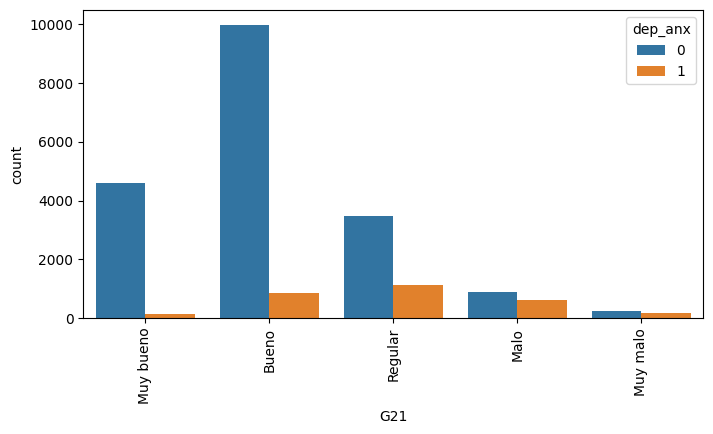

['Muy bueno', 'Bueno', 'Regular', 'Malo', 'Muy malo']
dep_anx          0          1
G21                          
1.0      97.128378   2.871622
2.0      92.111326   7.888674
3.0      75.375572  24.624428
4.0      58.941728  41.058272
5.0      56.641604  43.358396


In [245]:
x_ = 'G21'
multivariable_plot(x_)
percentage_dep_anx(x_)

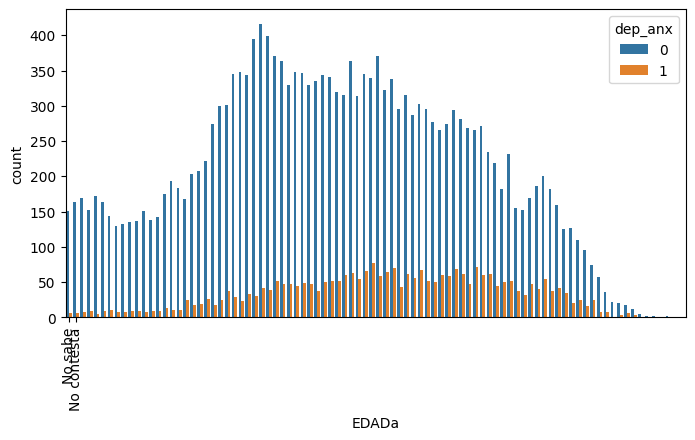

['No sabe', 'No contesta']
dep_anx           0          1
EDADa                         
15.0      96.178344   3.821656
16.0      96.470588   3.529412
17.0      96.022727   3.977273
18.0      94.409938   5.590062
19.0      97.175141   2.824859
20.0      94.767442   5.232558
21.0      93.506494   6.493506
22.0      94.890511   5.109489
23.0      94.285714   5.714286
24.0      93.750000   6.250000
25.0      93.793103   6.206897
26.0      94.968553   5.031447
27.0      93.877551   6.122449
28.0      94.039735   5.960265
29.0      93.085106   6.914894
30.0      95.073892   4.926108
31.0      94.358974   5.641026
32.0      87.046632  12.953368
33.0      92.272727   7.727273
34.0      91.629956   8.370044
35.0      89.516129  10.483871
36.0      93.835616   6.164384
37.0      92.307692   7.692308
38.0      88.790560  11.209440
39.0      92.245989   7.754011
40.0      93.800539   6.199461
41.0      91.246684   8.753316
42.0      92.941176   7.058824
43.0      91.028446   8.971554
44.0      91

In [248]:
x_ = 'EDADa'
multivariable_plot(x_)
pd.set_option('display.max_rows', None)
percentage_dep_anx(x_)
